# Deep Learning Implementation of Blood Cells Classifier using SKlearn, TensorFlow and PyTorch  Frameworks

# Blood Cell Datasets

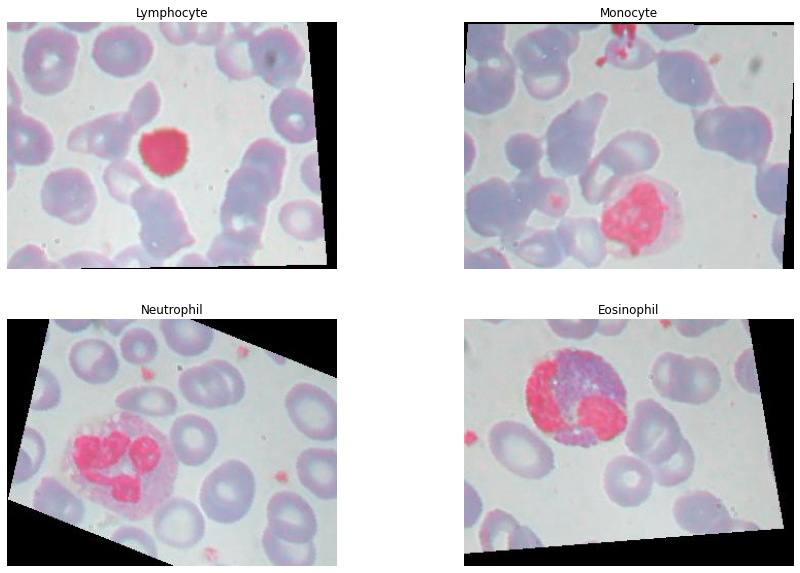

In [1]:
# Importing modules
from matplotlib import pyplot as plt
import cv2

# Plotting
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title('Lymphocyte'); plt.axis('off'); plt.imshow(cv2.imread('/data/rajan_data/AI_ML/datasets/blood_cell_images/data/train/LYMPHOCYTE/_1_3174.jpeg'))
plt.subplot(222)
plt.title('Monocyte'); plt.axis('off');plt.imshow(cv2.imread('/data/rajan_data/AI_ML/datasets/blood_cell_images/data/train/MONOCYTE/_1_4923.jpeg'))
plt.subplot(223)
plt.title('Neutrophil'); plt.axis('off'); plt.imshow(cv2.imread('/data/rajan_data/AI_ML/datasets/blood_cell_images/data/train/NEUTROPHIL/_1_8847.jpeg'))
plt.subplot(224)
plt.title('Eosinophil'); plt.axis('off');plt.imshow(cv2.imread('/data/rajan_data/AI_ML/datasets/blood_cell_images/data/train/EOSINOPHIL/_11_9024.jpeg'))

# DL using scikit-learn framework

In [2]:
# Importing modules
import os
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

In [3]:
# Reading images based on their class

# Temp variables for storing feature and label data
target = []
flat_data = []

# Image location and classes
DataDirectory = '/data/rajan_data/AI_ML/datasets/blood_cell_images/data/train'
Categories = ["EOSINOPHIL", "LYMPHOCYTE", "MONOCYTE", "NEUTROPHIL"]

# Reading images, resizing and flattening image matrix
for i in Categories:
  target_class = Categories.index(i)
  path = os.path.join(DataDirectory,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    target.append(target_class)

# Converting image data in list object to dataframe
flat_data = np.array(flat_data)
target = np.array(target)
df = pd.DataFrame(flat_data)
df['Target'] = target

In [4]:
# Preprocessing

# Feature matrix
x = df.iloc[:,:-1].values

# Labels
y = target

# Train test split
x_train,x_test,y_train,y_test = train_test_split(x, y, shuffle=True, test_size = 0.3, random_state=109, stratify=y)

# Scaling the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [5]:
# Hyperparameter optimization and training

# Model
model = MLPClassifier()

# Parameters for tuning the model
parameters = [{'hidden_layer_sizes': [50, 100],
                     'solver': ["lbfgs", "sgd", "adam"]}]

# Running grid search with 2 fold cross validation
cv = GridSearchCV(model, parameters, refit = True, verbose=3, cv=2) 
cv.fit(x_train_scaled, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END hidden_layer_sizes=50, solver=lbfgs;, score=0.555 total time=   9.0s
[CV 2/2] END hidden_layer_sizes=50, solver=lbfgs;, score=0.571 total time=   8.6s
[CV 1/2] END .hidden_layer_sizes=50, solver=sgd;, score=0.568 total time=  15.6s
[CV 2/2] END .hidden_layer_sizes=50, solver=sgd;, score=0.585 total time=  13.6s
[CV 1/2] END hidden_layer_sizes=50, solver=adam;, score=0.548 total time=   6.5s
[CV 2/2] END hidden_layer_sizes=50, solver=adam;, score=0.556 total time=   8.4s
[CV 1/2] END hidden_layer_sizes=100, solver=lbfgs;, score=0.548 total time=  15.1s
[CV 2/2] END hidden_layer_sizes=100, solver=lbfgs;, score=0.584 total time=  15.8s
[CV 1/2] END hidden_layer_sizes=100, solver=sgd;, score=0.585 total time=  20.6s
[CV 2/2] END hidden_layer_sizes=100, solver=sgd;, score=0.607 total time=  20.1s
[CV 1/2] END hidden_layer_sizes=100, solver=adam;, score=0.512 total time=  12.2s
[CV 2/2] END hidden_layer_sizes=100, solve

GridSearchCV(cv=2, estimator=MLPClassifier(),
             param_grid=[{'hidden_layer_sizes': [50, 100],
                          'solver': ['lbfgs', 'sgd', 'adam']}],
             verbose=3)


Classification report of model:
               precision    recall  f1-score   support

           0       0.59      0.62      0.61       150
           1       0.76      0.71      0.74       167
           2       0.92      0.82      0.86       175
           3       0.47      0.56      0.51       135

    accuracy                           0.69       627
   macro avg       0.69      0.68      0.68       627
weighted avg       0.70      0.69      0.69       627

Accuracy score: 68.58054226475278


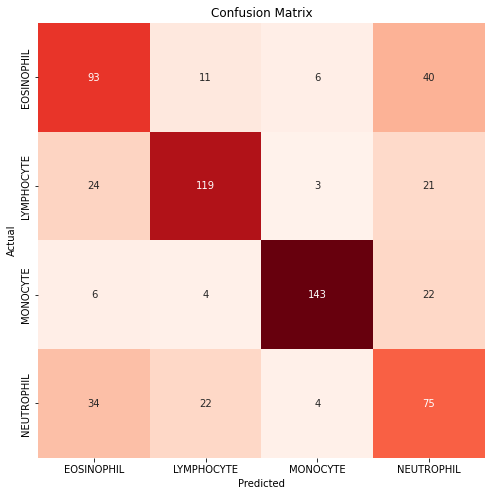

In [6]:
# Performing prediction

# Selecting best fit model for testing
best_model = cv.best_estimator_

# Performing prediction
y_prediction = best_model.predict(x_test_scaled)

# Output model performance 
cm = confusion_matrix(y_prediction,y_test)
print("\nClassification report of model:\n",classification_report(y_prediction,y_test))
print("Accuracy score:",100*accuracy_score(y_prediction,y_test))

# Confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=False)
plt.xticks(ticks=np.arange(4) + 0.5, labels=Categories)
plt.yticks(ticks=np.arange(4) + 0.5, labels=Categories)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# DL using TensorFlow framework with Keras interface

In [7]:
# Importing modules/libraries/framework
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import plotly
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
import cv2

2023-07-20 17:57:12.113936: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-20 17:57:12.631528: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
# Creating training, validation and test dataset

# Image directory
train_dataset_path = "/data/rajan_data/AI_ML/datasets/blood_cell_images/data/train"
test_dataset_path = "/data/rajan_data/AI_ML/datasets/blood_cell_images/data/test"

# Preparing and augmenting the images
testGen = ImageDataGenerator()
trainGen = ImageDataGenerator(validation_split=0.15,vertical_flip=True,horizontal_flip=True,rotation_range=0.2)
trainGenerator = trainGen.flow_from_directory(train_dataset_path,subset="training",target_size=(224,224))
validationGenerator = trainGen.flow_from_directory(train_dataset_path,subset="validation",target_size=(224,224))
testGenerator = testGen.flow_from_directory( test_dataset_path,target_size=(224,224),shuffle=False) 

Found 1775 images belonging to 4 classes.
Found 312 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [9]:
# Base model ResNet50
base_model = ResNet50(include_top=False,weights="imagenet")

# Preserving the werights for all layers
for layer in base_model.layers[:140]:
    layer.trainable = False

# Adding new layers for input, pooling and output
model = keras.Sequential()

model.add(layers.Input(shape=(224,224,3)))
model.add(layers.Lambda(keras.applications.resnet50.preprocess_input))
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(4,activation="softmax"))
model.summary()

2023-07-20 17:57:13.249911: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23595908 (90.01 MB)
Trainable params: 14986244 (57.17 MB)
Non-trainable params: 8609664 (32.84 MB)
_________________________________________________________________


In [10]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

r = model.fit_generator(
  trainGenerator,
  validation_data=validationGenerator,
  epochs=10,
  steps_per_epoch=len(trainGenerator),
  validation_steps=len(validationGenerator)
)

/tmp/ipykernel_57755/1284191678.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
56/56 [==============================] - 48s 795ms/step - loss: 0.3134 - accuracy: 0.8997 - val_loss: 79.3486 - val_accuracy: 0.5609
Epoch 2/10
56/56 [==============================] - 43s 772ms/step - loss: 0.0306 - accuracy: 0.9932 - val_loss: 0.3778 - val_accuracy: 0.9744
Epoch 3/10
56/56 [==============================] - 43s 771ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0150 - val_accuracy: 0.9968
Epoch 4/10
56/56 [==============================] - 44s 776ms/step - loss: 0.0323 - accuracy: 0.9893 - val_loss: 3.2723 - val_accuracy: 0.8590
Epoch 5/10
56/56 [==============================] - 44s 774ms/step - loss: 0.0610 - accuracy: 0.9854 - val_loss: 19.5880 - val_accuracy: 0.6314
Epoch 6/10
56/56 [==============================] - 44s 775ms/step - loss: 0.0309 - accuracy: 0.9932 - val_loss: 1.0058 - val_accuracy: 0.8077
Epoch 7/10
56/56 [==============================] - 44s 787ms/step - loss: 0.0214 - accuracy: 0.9949 - val_loss: 0.0597 - val_accuracy: 0.98

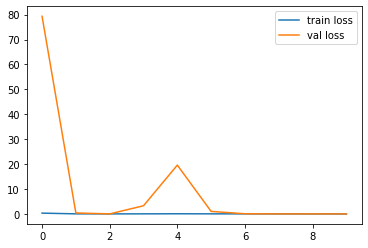

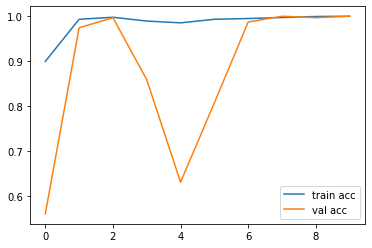

<Figure size 432x288 with 0 Axes>

In [11]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

13/13 [==============================] - 6s 388ms/step
Test Accuracy: 100.000 %


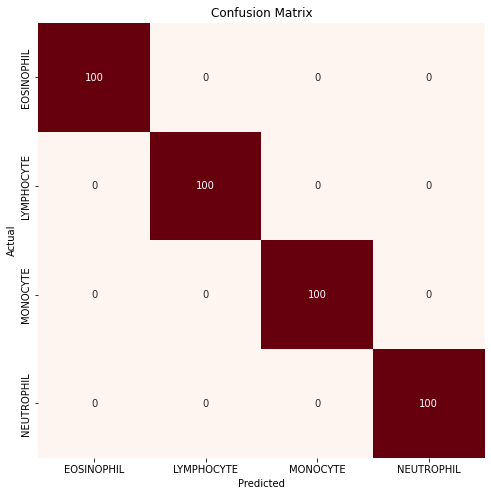

Classification Report:
-----------------------------
               precision    recall  f1-score   support

  EOSINOPHIL       1.00      1.00      1.00       100
  LYMPHOCYTE       1.00      1.00      1.00       100
    MONOCYTE       1.00      1.00      1.00       100
  NEUTROPHIL       1.00      1.00      1.00       100

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [12]:
# Generating classification report on blind dataset i.e test dataset
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model.predict(testGenerator), axis=1)

acc = accuracy_score(testGenerator.labels, predictions)
cm = tf.math.confusion_matrix(testGenerator.labels, predictions)
clr = classification_report(testGenerator.labels, predictions, target_names=CLASS_NAMES)
clr
print("Test Accuracy: {:.3f} %".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=False)
plt.xticks(ticks=np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks=np.arange(4) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-----------------------------\n", clr)

# DL using PyTorch framework

In [1]:
# Importing modules
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torch.utils.data import DataLoader, Dataset, Subset
from torch.utils.data import random_split, SubsetRandomSampler
from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from pytorch_lightning import LightningModule
from pytorch_lightning import Trainer
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from PIL import Image
import seaborn as sns

In [2]:
# Getting class names
dir0='/data/rajan_data/AI_ML/datasets/blood_cell_images/data/train'
class_names=sorted(os.listdir(dir0))
print(class_names)

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


In [3]:
# Preprocessing

# Image augmentation to reduce bias
transform=transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

# Dataset prepration
class DataModule(pl.LightningDataModule):
    
    def __init__(self, transform=transform, batch_size=32):
        super().__init__()
        self.root_dir = "/data/rajan_data/AI_ML/datasets/blood_cell_images/data/train"
        self.transform = transform
        self.batch_size = batch_size

# Train Test split
    def setup(self, stage=None):
        dataset = datasets.ImageFolder(root=self.root_dir, transform=self.transform)
        n_data = len(dataset)
        n_train = int(0.8 * n_data)
        n_test = n_data - n_train

        train_dataset, test_dataset = torch.utils.data.random_split(dataset, [n_train, n_test])

        self.train_dataset = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
        self.test_dataset = DataLoader(test_dataset, batch_size=self.batch_size)

# Train dataset loader
    def train_dataloader(self):
        return self.train_dataset

# Test dataset loader
    def test_dataloader(self):
        return self.test_dataset

In [4]:
# CNN model
class ConvolutionalNetwork(LightningModule):
    
    def __init__(self):
        super(ConvolutionalNetwork, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(16 * 54 * 54, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 20)
        self.fc4 = nn.Linear(20, len(class_names))

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 16 * 54 * 54)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = self.fc4(X)
        return F.log_softmax(X, dim=1)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.004)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        X, y = train_batch
        y_hat = self(X)
        loss = F.cross_entropy(y_hat, y)
        pred = y_hat.argmax(dim=1, keepdim=True)
        acc = pred.eq(y.view_as(pred)).sum().item() / y.shape[0]
        self.log("train_loss", loss)
        self.log("train_acc", acc)
        return loss

    def validation_step(self, val_batch, batch_idx):
        X, y = val_batch
        y_hat = self(X)
        loss = F.cross_entropy(y_hat, y)
        pred = y_hat.argmax(dim=1, keepdim=True)
        acc = pred.eq(y.view_as(pred)).sum().item() / y.shape[0]
        self.log("val_loss", loss)
        self.log("val_acc", acc)

    def test_step(self, test_batch, batch_idx):
        X, y = test_batch
        y_hat = self(X)
        loss = F.cross_entropy(y_hat, y)
        pred = y_hat.argmax(dim=1, keepdim=True)
        acc = pred.eq(y.view_as(pred)).sum().item() / y.shape[0]
        self.log("test_loss", loss)
        self.log("test_acc", acc)

In [5]:
# Executing model and training
if __name__ == '__main__':
    datamodule = DataModule()
    datamodule.setup()
    model = ConvolutionalNetwork()
    trainer = pl.Trainer(max_epochs=20)
    trainer.fit(model, datamodule)
    datamodule.setup(stage='test')
    test_loader = datamodule.test_dataloader()
    trainer.test(dataloaders=test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/user/miniconda3/envs/ml/lib/python3.11/site-packages/pytorch_lightning/trainer/configuration_validator.py:70: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
You are using a CUDA device ('NVIDIA RTX A5000') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
2023-07-20 18:05:09.372484: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations,

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.
/home/user/miniconda3/envs/ml/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:148: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
Restoring states from the checkpoint path at /data/rajan_data/AI_ML/lightning_logs/version_7/checkpoints/epoch=19-step=1060.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /data/rajan_data/AI_ML/lightning_logs/version_7/checkpoints/epoch=19-step=1060.ckpt
/home/user/miniconda3/envs/ml/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottlenec

Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Runningstage.testing metric      DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9258373379707336
        test_loss           0.18898986279964447
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Test Accuracy: 92.584 %


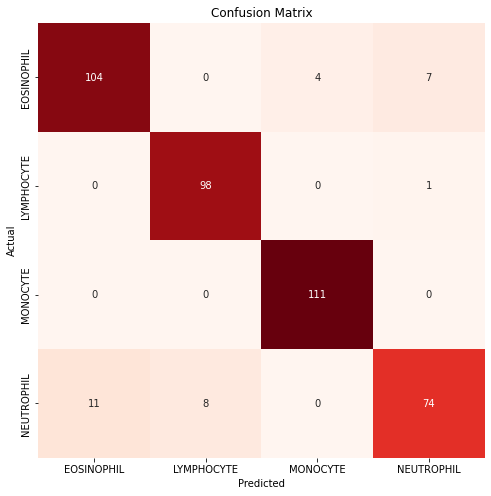

Classification Report:
-----------------------------
               precision    recall  f1-score   support

  EOSINOPHIL     0.9043    0.9043    0.9043       115
  LYMPHOCYTE     0.9245    0.9899    0.9561        99
    MONOCYTE     0.9652    1.0000    0.9823       111
  NEUTROPHIL     0.9024    0.7957    0.8457        93

    accuracy                         0.9258       418
   macro avg     0.9241    0.9225    0.9221       418
weighted avg     0.9249    0.9258    0.9243       418



In [6]:
# Testing the model
device = torch.device("cpu")   #"cuda:0"
model.eval()
y_true=[]
y_pred=[]
with torch.no_grad():
    for test_data in datamodule.test_dataloader():
        test_images, test_labels = test_data[0].to(device), test_data[1].to(device)
        pred = model(test_images).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())


# Performance 
acc = accuracy_score(y_true,y_pred)
cm = confusion_matrix(y_true,y_pred)
clr = classification_report(y_true,y_pred,target_names=class_names,digits=4)
clr
print("Test Accuracy: {:.3f} %".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=False)
plt.xticks(ticks=np.arange(4) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(4) + 0.5, labels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-----------------------------\n", clr)